# Using ANN


## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club



LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

__we will build model using ANN to predict whether someone will pay back their loans or not based on previous data__

In [10]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
import io
import pandas as pd
df= pd.read_csv(io.BytesIO(uploaded['lending_club_loan_two.csv']))

In [141]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## EDA 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [143]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

As we can see, There are alot of missing data in our dataset

In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


Its good to see the distrubution of the label or the target variable to see if its balanced or not Since we will be attempting to predict loan_status.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


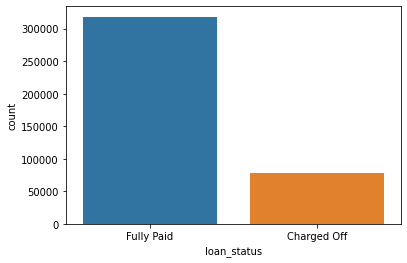

In [145]:
sns.countplot(df['loan_status']);

We can see that the label is imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


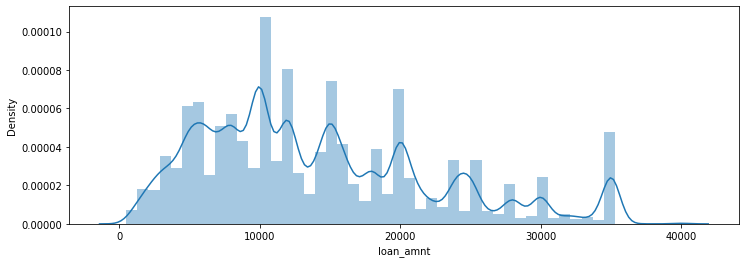

In [146]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'])

a histogram of the loan_amnt column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


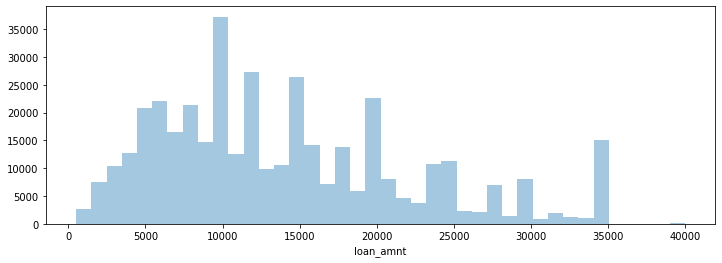

In [147]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

## Lets explore the correlation between the numeric features

In [148]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


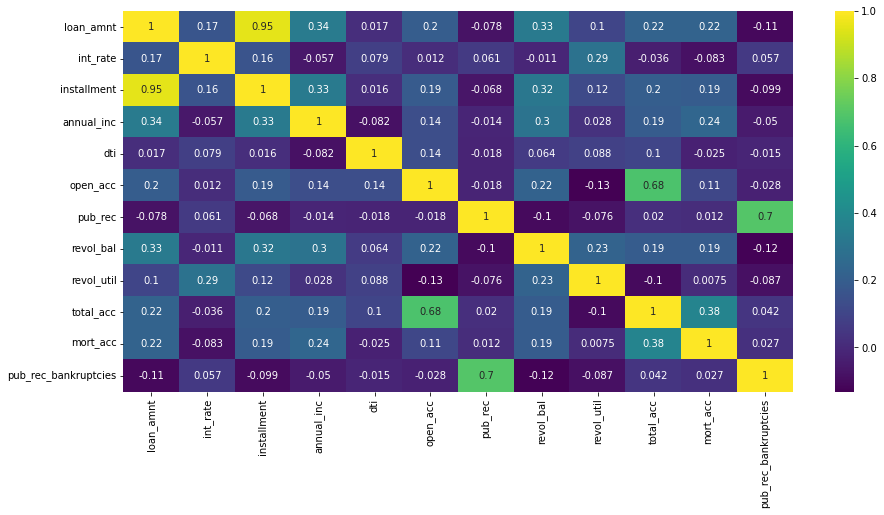

In [149]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

As we can see,installment have perfect correlation with loan_amount, which mean it maybe duplicate values of our twith loan_amnt

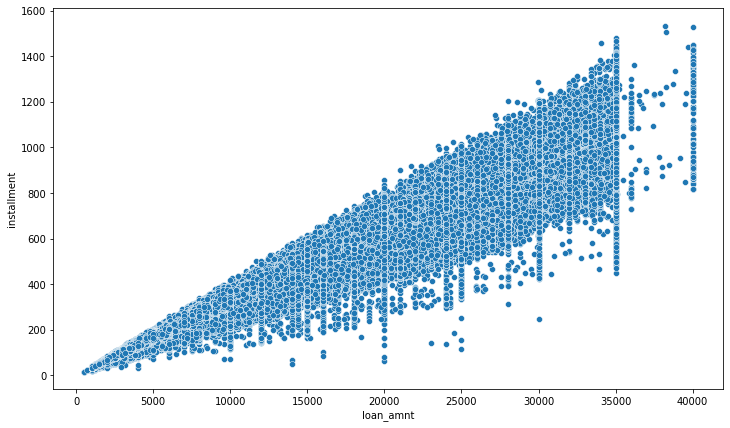

In [150]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='loan_amnt',y='installment',data=df)

as we can see installment and loan amount is highly correlated with each others.

## boxplot showing the relationship between the loan_status and the Loan Amount.
just to answer `uestion if the loan is high what are the chances they will charge off not paying them

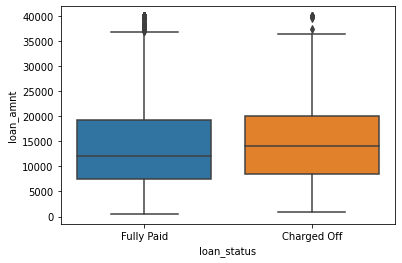

In [151]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

it looks kindly similer, we can view that by groupby function also

In [152]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


## Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [153]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [154]:
# we can sort them 
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [155]:
# also we will do that for sungrades
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Create a countplot per grade. Set the hue to the loan_status label.

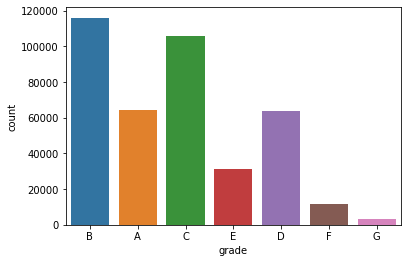

In [156]:
sns.countplot(x='grade',data=df)

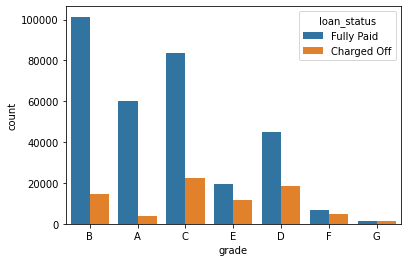

In [157]:
sns.countplot(x='grade',data=df,hue='loan_status')

we wanna see the status of paying your loan or charge off based on your grade.
we can see the percentage of charge of not paying the loan increase compared to fully paid based on grades.
the best customers grade A and B

## lets do it for sub_grade

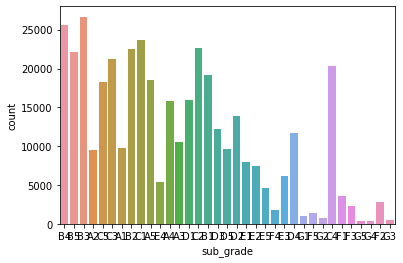

In [158]:
sns.countplot(x='sub_grade',data=df)

In [159]:
# to order the values
subgrade_order=sorted(df['sub_grade'].unique())

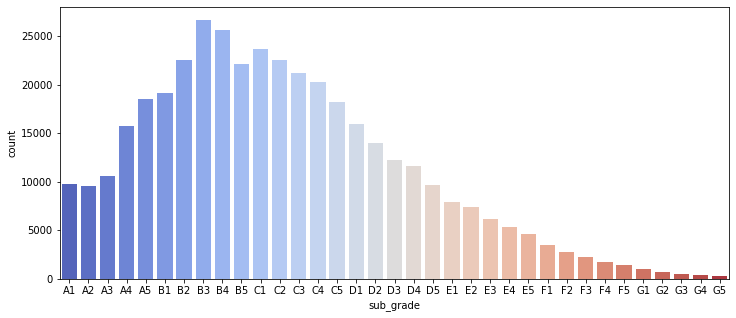

In [160]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

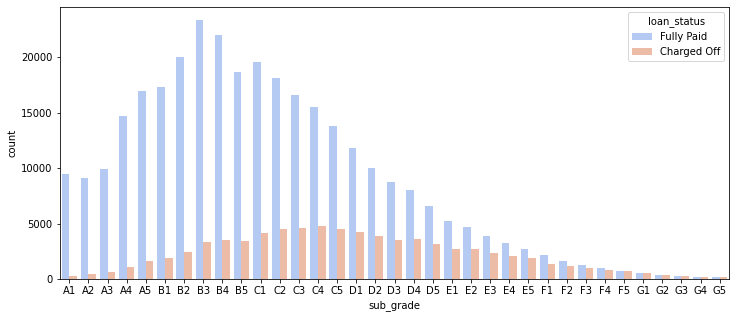

In [161]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

As we can see, the percwentage of customers of F and G grades they dont pay that often. so lets do deeper analysis for them

Isloate those and recreate the countplot just for those subgrades

In [162]:
f_and_g=df[(df['grade']=='G') | (df['grade']=='F')]

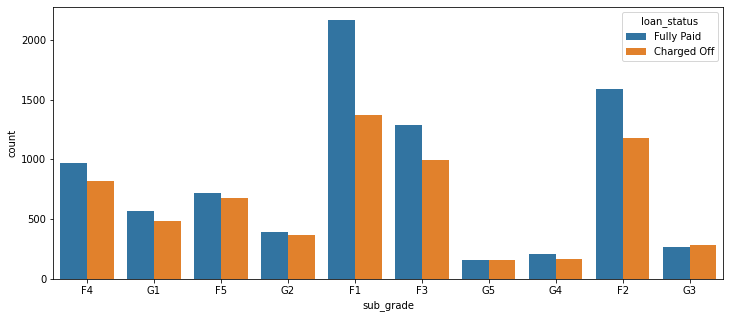

In [163]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=f_and_g,hue='loan_status')

In [164]:
# lets order them
subgrade_order=sorted(f_and_g['sub_grade'].unique())

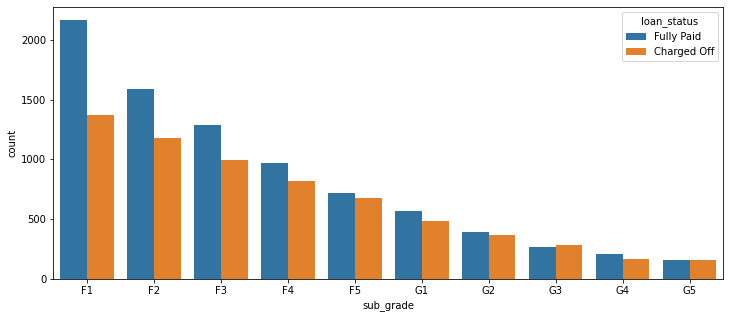

In [165]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=f_and_g,hue='loan_status',order=subgrade_order)

As we can see the more the subgrade is the more percentage they are not paying their loan.

## Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [166]:
df['load_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [167]:
# to see if we map it correctly
df[['load_repaid','loan_status']]

,load_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


# Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.

In [168]:
df.corr()['load_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
load_repaid             1.000000
Name: load_repaid, dtype: float64

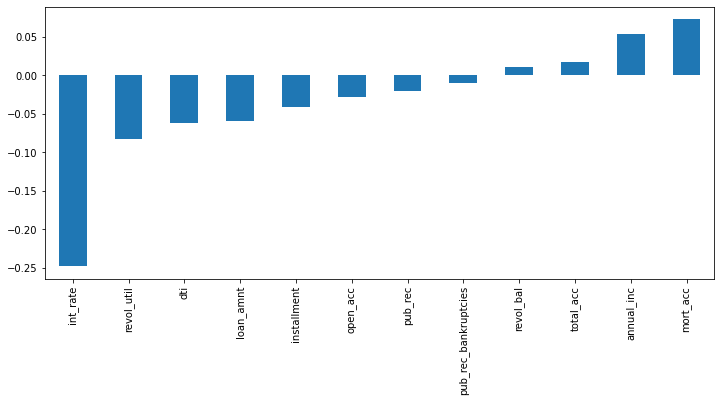

In [169]:
plt.figure(figsize=(12,5))
df.corr()['load_repaid'].drop('load_repaid').sort_values().plot(kind='bar')

thats shows you the feature correlated with our target, installment rate have negative correlation with paying the loan or not, and its logical since we have high interest rate the chances to not paying is high

# **Section 2: Data PreProcessing**

Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [170]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,load_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


## Missing Data
Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

TASK: What is the length of the dataframe?

In [171]:
len(df)

396030

In [172]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
load_repaid                 0
dtype: int64

In [173]:
# Convert this Series to be in term of percentage of the total DataFrame
(df.isnull().sum()/(len(df)))*100


loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
load_repaid             0.000000
dtype: float64

we can see that mort_acc  have almost 10% from overall data is missing.
lets work one by one from begaining to eaither remove the columns or fill them

# emp_title
The job title supplied by the Borrower when applying for the loan.
# emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [174]:
#how many unique employment job titles are there?

df['emp_title'].nunique()

173105

In [175]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [176]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

so there is way too many title to convert them to dummies features, so we remove this column


In [177]:
df=df.drop('emp_title',axis=1)

In [178]:
(df.isnull().sum()/(len(df)))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
load_repaid             0.000000
dtype: float64

## Create a count plot of the emp_length feature column.

In [179]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [180]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

so we will save them as list 

In [181]:
emp_length_order=['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

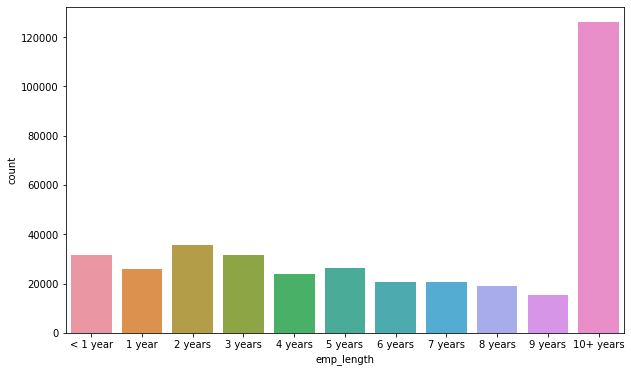

In [182]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

so here we see the customers taking laons vs how many years there are working which make since, ppl take loans if they are working. so we can see thme below per laon_status

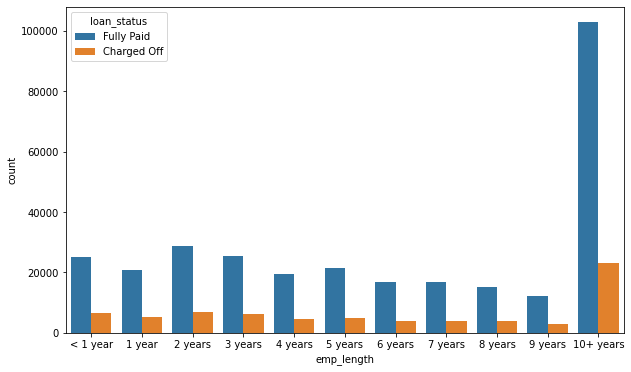

In [183]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

we wanted to see if the number of years working have significant affect wethear you will pay your loan or charge off, for example if you have less working years you the chances you will not pay back verses long working years have higher chance to pay their loans. but thats not the case. so this is not important feature. but to make sure, lets see the percentage of charge off per emplyment length

To do that we need to do it step by step.
- first we want to see the percentage of ppl that dont pay back their loan

In [184]:
# first filter out the ppl charge off
df[df['loan_status']=='Charged Off']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,load_repaid
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
25,6000.0,36 months,11.36,197.47,B,B5,2 years,RENT,46680.0,Not Verified,Apr-2010,Charged Off,medical,Medical and Post Graduate Education Expenses,6.56,Oct-2003,9.0,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,...",0
26,8400.0,36 months,13.35,284.45,C,C2,6 years,RENT,35000.0,Source Verified,Jun-2014,Charged Off,debt_consolidation,Debt consolidation,23.08,Jun-2004,6.0,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\r\nDPO AE 48052,0
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,Aug-2013,Charged Off,debt_consolidation,Cover,18.76,Jun-2009,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723",0
41,28000.0,60 months,19.91,312.04,E,E4,10+ years,RENT,52000.0,Verified,Dec-2011,Charged Off,debt_consolidation,Debt Consalidation,20.70,Dec-1988,10.0,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396000,10000.0,36 months,12.85,336.22,B,B4,10+ years,MORTGAGE,95000.0,Source Verified,Jan-2014,Charged Off,debt_consolidation,Debt consolidation,15.35,Dec-1989,9.0,1.0,5718.0,57.8,37.0,w,INDIVIDUAL,6.0,1.0,"66798 Jessica Avenue Apt. 921\r\nPort Angela, ...",0
396001,15000.0,60 months,15.61,361.67,D,D1,10+ years,MORTGAGE,47000.0,Source Verified,Jun-2014,Charged Off,credit_card,Credit card refinancing,20.48,May-2004,9.0,0.0,4621.0,55.0,15.0,w,INDIVIDUAL,1.0,0.0,"1398 Allen Mission\r\nAdrianstad, ME 22690",0
396002,17500.0,36 months,13.66,595.23,C,C3,< 1 year,RENT,70000.0,Source Verified,Jan-2015,Charged Off,credit_card,Credit card refinancing,19.08,Sep-2005,22.0,0.0,16637.0,88.0,42.0,f,INDIVIDUAL,0.0,0.0,"127 Gregory Vista\r\nFowlerville, AZ 70466",0
396011,13000.0,36 months,10.99,425.55,B,B4,10+ years,RENT,56000.0,Not Verified,Feb-2015,Charged Off,debt_consolidation,Debt consolidation,14.79,Apr-2000,6.0,0.0,9964.0,64.3,23.0,w,INDIVIDUAL,3.0,0.0,"7359 Stone Land\r\nWest Josefurt, SC 30723",0


In [185]:
#then group them based on their count employment length
df[df['loan_status']=='Charged Off'].groupby('emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,load_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5131,5154,5154,5154,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23109,23215,23215,23215,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6900,6924,6924,6924,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6150,6182,6182,6182,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4586,4608,4608,4608,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5073,5092,5092,5092,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3931,3943,3943,3943,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4045,4055,4055,4055,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3822,3829,3829,3829,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [186]:
# now lets just see the count based on laon_status and save it
emp_charge_off=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_charge_off

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [187]:
# doing the same for fully paid
emp_fully_paid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [188]:
# then divide them to see the ratio
emp_len = emp_charge_off/emp_fully_paid

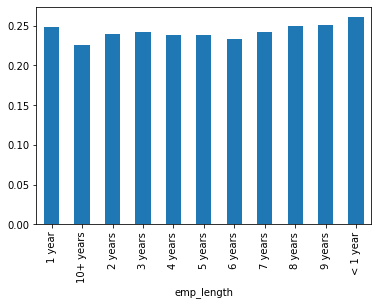

In [189]:
# then view it as bar chart to see if there is significant meaning
emp_len.plot(kind='bar')

so their is no significant difference on charge off rate, so we drop this feature

In [190]:
df=df.drop('emp_length',axis=1)

In [191]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
load_repaid                 0
dtype: int64

## Review the title column vs the purpose column. Is this repeated information?

In [192]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [193]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

so it looks like its dublicate information

In [194]:
df = df.drop('title',axis=1)

In [195]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
load_repaid                 0
dtype: int64

# Now lets fill mort_acc feature based on the values of another coulmn in the dataframe

there are several ways to fill the data, but lets just see first if we can see another feature which is correlated with mort_acc and based on this correlation we fill the values.

# mort_acc
Number of mortgage accounts.

In [196]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,load_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [197]:
# lets see the values counts
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

this is nominal type of data which represent how many accounts the customers have for mortgage accounts.

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc

​

In [198]:
print("Correlation with the mort_acc column")
df.corr()['total_acc'].sort_values()

Correlation with the mort_acc column


revol_util             -0.104273
int_rate               -0.036404
load_repaid             0.017893
pub_rec                 0.019723
pub_rec_bankruptcies    0.042035
dti                     0.102128
revol_bal               0.191616
annual_inc              0.193023
installment             0.202430
loan_amnt               0.223886
mort_acc                0.381072
open_acc                0.680728
total_acc               1.000000
Name: total_acc, dtype: float64

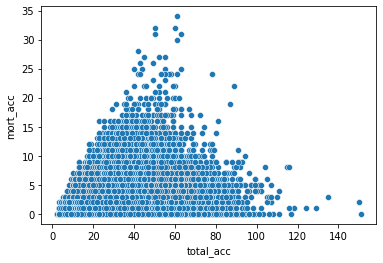

In [199]:
sns.scatterplot(x='total_acc',y='mort_acc',data=df)

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [200]:
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,load_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [201]:
# lets just spacify the goupby per mort_acc
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']


Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.

In [202]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [203]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [204]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [205]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
load_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().          

In [206]:
df = df.dropna()

In [207]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
load_repaid             0
dtype: int64

# **Categorical Variables and Dummy Variables**

We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

TASK: List all the columns that are currently non-numeric

In [208]:
# this to view all the categorical features remaining in our df
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Let's now go through all the string features to see what we should do with them.

## term feature

In [209]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

since this represent how many month the customer choose to pay thier loan, and since there is numeric relatioship, we can just extract the 36 and 60 to keep the numeric relationship

In [210]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [211]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

## grade feature
We already know grade is part of sub_grade, so just drop the grade feature

In [212]:
df = df.drop('grade',axis=1)

 Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [213]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [214]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [215]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'load_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [216]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

# verification_status, application_type,initial_list_status,purpose
Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [217]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [218]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

## home_ownership

In [219]:
#Review the value_counts for the home_ownership column.
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [220]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [221]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [222]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [223]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

## address

In [224]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [225]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

## issue_d

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [226]:
df = df.drop('issue_d',axis=1)

In [227]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

# earliest_cr_line
This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [228]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [229]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [230]:
# lets drop loan status since we already mapped it to loan_rapaid
df = df.drop('loan_status',axis=1)

# Split the data


In [237]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,load_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


In [238]:
X=df.drop('load_repaid',axis=1).values
y=df['load_repaid'].values

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

In [240]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [241]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Creating the Model

In [242]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [243]:
X_train.shape

(316175, 78)

In [247]:
model=Sequential()


# input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

# hidden layers
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam')

In [248]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 8s 5ms/step - loss: 0.3007 - val_loss: 0.2650
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2653 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2634 - val_loss: 0.2643
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2619 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2614 - val_loss: 0.2630
Epoch 6/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2605 - val_loss: 0.2625
Epoch 7/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2600 - val_loss: 0.2618
Epoch 8/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2594 - val_loss: 0.2618
Epoch 9/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2594 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.

## Evaluating Model Performance

In [250]:
losses=pd.DataFrame(model.history.history)

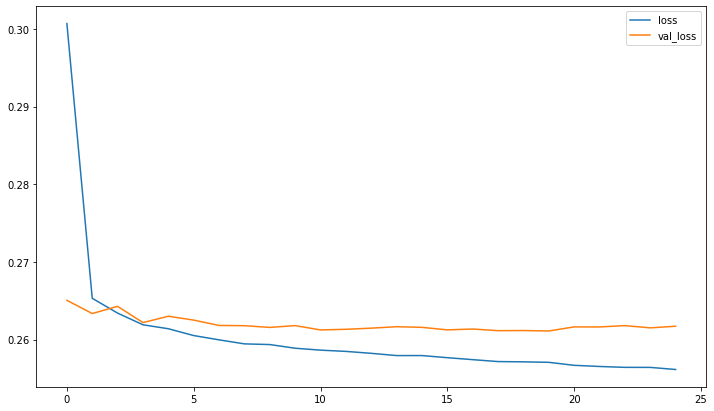

In [251]:
losses.plot(figsize=(12,7))

In [268]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [265]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [266]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [273]:
confusion_matrix(y_test,predictions)

array([[ 6801,  8857],
       [   79, 63307]])